# Sales Prediction in Retail

## Table of Contents

1. [Objective](#1)
2. [Column Description](#2)
3. [Initial Exploratory Data Analysis](#3)
4. [Dealing with Missing values in the dataset](#4)
5. [Feature Engineering](#5)
6. [Handling Categorical Variables](#6)
7. [Creating Train and Validation Data](#7)
8. [Linear Regression](#8)
9. [XG Boost](#9)
     - 9.1. [XGBoost Regressor with Grid Search CV](#9.1) <br>
     
     
     
10. [Model Evaluation](#10)

## 1. Objective  <a id='1'>

Goal of this project is to **predict the sales** of a Retail outlet based on the historical data provided for sales.

# 2. Column Description  <a id=2>

**Item Identifier**: A code provided for the item of sale <br>
**Item Weight**: Weight of item <br>
**Item Fat Content**: A categorical column of how much fat is present in the item : ‘Low Fat’, ‘Regular’, ‘low fat’, ‘LF’, ‘reg’ <br>
**Item Visibility**: Numeric value for how visible the item is  <br> 
**Item Type**: What category does the item belong to: ‘Dairy’, ‘Soft Drinks’, ‘Meat’, ‘Fruits and Vegetables’, ‘Household’, ‘Baking Goods’, ‘Snack Foods’, ‘Frozen Foods’, ‘Breakfast’, ’Health and Hygiene’, ‘Hard Drinks’, ‘Canned’, ‘Breads’, ‘Starchy Foods’, ‘Others’, ‘Seafood’. <br>
**Item MRP**: The MRP price of item <br>
**Outlet Identifier**: Which outlet was the item sold. This will be categorical column <br>
**Outlet Establishment Year**: Which year was the outlet established <br>
**Outlet Size**: A categorical column to explain size of outlet: ‘Medium’, ‘High’, ‘Small’.  <br> 
**Outlet Location Type**: A categorical column to describe the location of the outlet: ‘Tier 1’, ‘Tier 2’, ‘Tier 3’  <br>
**Outlet Type** : Categorical column for type of outlet: ‘Supermarket Type1’, ‘Supermarket Type2’, ‘Supermarket Type3’, ‘Grocery Store’  <br>
**Item Outlet Sales**: The amount of sales for an item.  <br> 
**Source**: Whether the data is from train or test.  <br>

## 3. Initial Exploratory Data Analysis  <a id=3>

In the first step we are going to acquire data into dataframes for further processing.

In [1]:
# Importing the packages and dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [2]:
data_Train = pd.read_csv("Train_Retail.csv")
data_Test = pd.read_csv("Test_Retail.csv")
data_Train['Source'] = 'train'
data_Test['Source'] = 'test'

In [3]:
data_Train.shape                                    # Checking the shape of the data_train dataframe

(8523, 13)

In [4]:
data_Test.shape                                     # Checking the shape of the data_test dataframe

(5681, 12)

In [5]:
data_Train.head()                                    # CHecking the first 5 rows

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [6]:
data_Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


With this it is clear that we have the columns named "Item_Identifier","Item_Weight","Item_Fat_Content","Item_Visibility","Item_Type","Item_MRP","Outlet_Identifier",
"Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Outlet_Sales" in our training dataset.<br><br> Of all these attributes all the columns in the starting are **predictors for the outcome "Item_Outlet_Sales"**.

Now check for the datatypes of different columns in the dataset which will be helpful in further data processing operations. 

In [7]:
data_Train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Source                        object
dtype: object

In [8]:
data_Test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Source                        object
dtype: object

We can see that our dataset has numerical values in them and also we have few of the categorical columns. <br><br>Lets check for any of the missing data items in different attributes for our datasets.  

In [9]:
data_Train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Source                          0
dtype: int64

In our training dataset we have the missing data values for the columns **"Item_Weight"** and **"Outlet_Size"** each of them having missing values for 1463 and 2410 number of rows. By checking the same for Test dataset. 

In [10]:
data_Test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Source                          0
dtype: int64

Our Test dataset also have missing values for **"Item_Weight"** and **"Outlet_Size"** columns. <br>  <br>
For better understanding the values in the dataset lets have a look into the statistics of our datasets.

In [11]:
data_Train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Some Important Observations from the Statistics of Training dataset:

1. Column "Item_Weight" has values ranging from 4.56 to 21.35 with a mean value of 12.86 (adjusted to 2 decimal points). Count is showing as 7060 although we have 8523 number of rows in our training dataset. This phenomenon is justified by missing value count of 1463.
2. "Item_MRP" has values ranging from 31.29 to 266.89 with a mean value of 141. 
3. "Outlet_Establishment_Year" has values ranging from 1985 to 2009. From this we can see that, first store started is in 1985 and the most recent store started in 2009.

Doing the same for our Test dataset. 

In [12]:
data_Test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## 4. Dealing with Missing values in the dataset   <a id=4>

We will fill the missing values with the mean of that attribute.

Lets have a look at the mean of all the numeric columns in the Training and Test data.

In [13]:
data_Train.mean()

Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [14]:
data_Test.mean()

Item_Weight                    12.695633
Item_Visibility                 0.065684
Item_MRP                      141.023273
Outlet_Establishment_Year    1997.828903
dtype: float64

We will fill the missing values with the mean in both Training and Test data

In [15]:
data_Train = data_Train.fillna(data_Train.mean())

In [16]:
data_Test = data_Test.fillna(data_Test.mean())

We have missing values in **the categorical variable OutletSize**. We are going to impute the missing values in the Outlet size with the value which will balance this 'Outlet Size' column.

In [17]:
pd.crosstab(data_Train['Outlet_Size'], 'count')

col_0,count
Outlet_Size,
High,932
Medium,2793
Small,2388


In [18]:
pd.crosstab(data_Test['Outlet_Size'], 'count')

col_0,count
Outlet_Size,
High,621
Medium,1862
Small,1592


We can observe that the dataset is imbalanced and there are less occurance of "High". So we will use this to fill missing values.
After this step, out column should be balanced.

In [19]:
data_Train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Source                          0
dtype: int64

In [20]:
data_Test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Source                          0
dtype: int64

'Outlet Size' of both train and test data are imbalanced because we have less number of occurrence in Class "High".  <br>

In [21]:
data_Train['Outlet_Size'] = data_Train['Outlet_Size'].fillna('High')

In [22]:
data_Test['Outlet_Size'] = data_Test['Outlet_Size'].fillna('High')

In [23]:
pd.crosstab(data_Train['Outlet_Size'], 'count')

col_0,count
Outlet_Size,
High,3342
Medium,2793
Small,2388


In [24]:
pd.crosstab(data_Test['Outlet_Size'], 'count')

col_0,count
Outlet_Size,
High,2227
Medium,1862
Small,1592


Now both the Train and Test data look balanced.  <br>  <br>
Lets check for any more null values.

In [25]:
data_Train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Source                       0
dtype: int64

In [26]:
data_Test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Source                       0
dtype: int64

### Visualizations

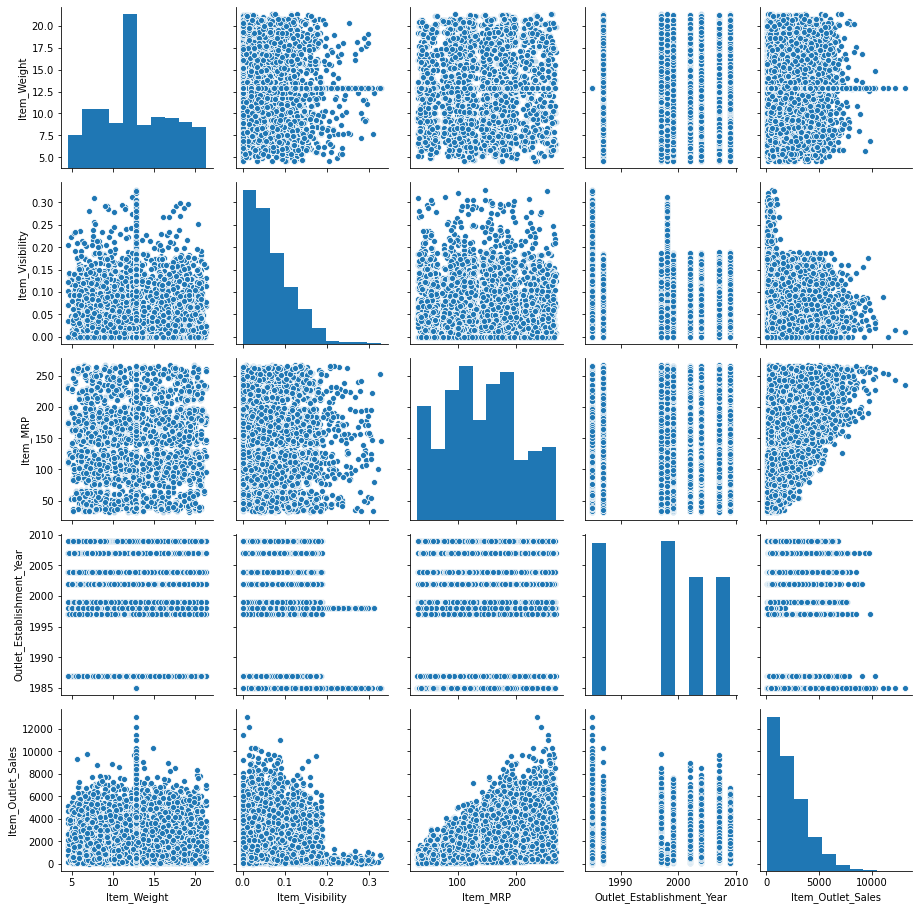

In [27]:
# Lets visualize the relation between the variables

sns.pairplot(data_Train)

**Observation**: There is no significant correlation between the variables.

In [28]:
# Lets have a look at the correlations between the attributes.

corr = data_Train.corr()

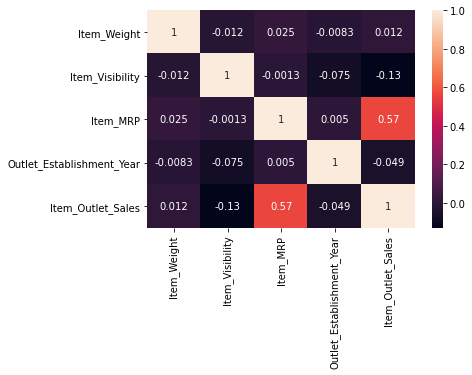

In [29]:
sns.heatmap(corr, annot=True)

**Observations**: There is moderate correlation between **Item_Outlet_Sales** and **Item_MRP**.

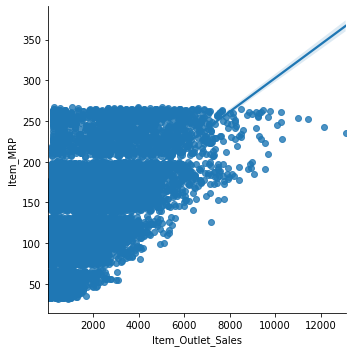

In [30]:
sns.lmplot(x='Item_Outlet_Sales', y='Item_MRP', data=data_Train)

**Observation**: This shows the moderate correlation.

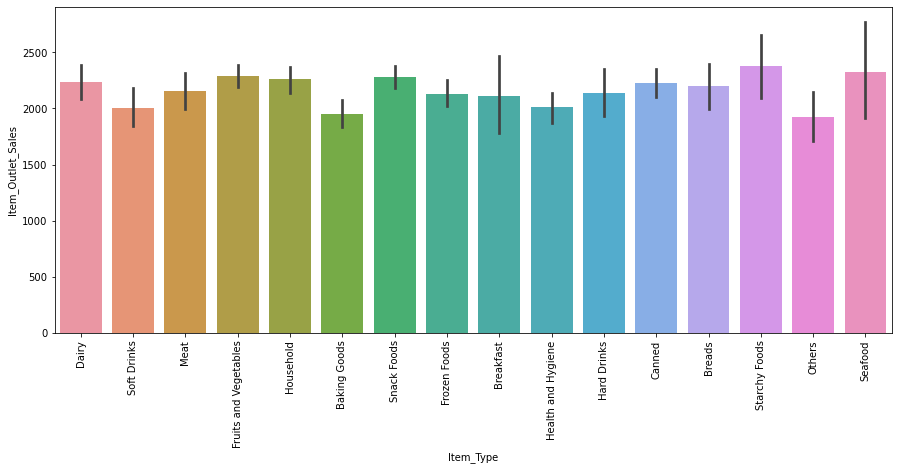

In [31]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.barplot(x='Item_Type', y = 'Item_Outlet_Sales', data = data_Train)

**Observation** : Most of the sales amount are happening for Starchy Foods or Seafood. 

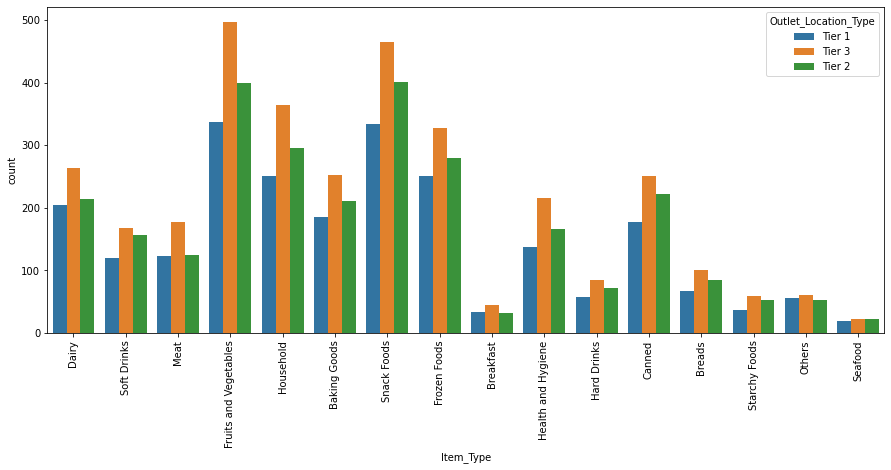

In [32]:
plt.figure(figsize=[15,6])
plt.xticks(rotation=90)
sns.countplot(data_Train.Item_Type,hue=data_Train.Outlet_Location_Type)

**Observation**: Fruits and Vegetables are the most sold items in Tier 3 and Tier 1 cities whereas Snack Foods are the most sold items in Tier 2 cities. <br>

So finally we can conclude that Fruits and Vegetables are the most sold items in 3 location and Seafood is the least sold item in 3 locations.

In [33]:
data_Train.groupby(['Outlet_Location_Type'])['Item_Type'].value_counts()

Outlet_Location_Type  Item_Type            
Tier 1                Fruits and Vegetables    337
                      Snack Foods              334
                      Frozen Foods             250
                      Household                250
                      Dairy                    205
                      Baking Goods             185
                      Canned                   177
                      Health and Hygiene       138
                      Meat                     123
                      Soft Drinks              120
                      Breads                    67
                      Hard Drinks               58
                      Others                    56
                      Starchy Foods             36
                      Breakfast                 33
                      Seafood                   19
Tier 2                Snack Foods              401
                      Fruits and Vegetables    399
                      Household       

**Observation** : There is not much difference in purchase patterns in different city types.

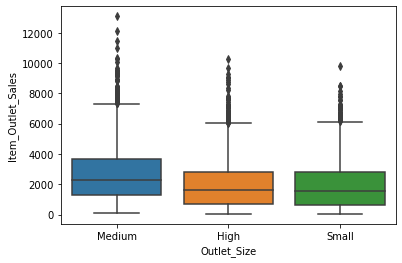

In [34]:
sns.boxplot(x='Outlet_Size', y = 'Item_Outlet_Sales', data = data_Train)

**Observation**: Maximum sales is incurred from medium size outlets. Outliers are present in the Item_Outlet_Sales across all the given Outlet_Size.<br>

Median outlet sales of Medium outlet size varies greatly from High and Small sized outlets and that can be confirmed from the table below.

In [35]:
median_sales=data_Train.Item_Outlet_Sales.groupby(data_Train.Outlet_Size).median()
median_sales

Outlet_Size
High      1637.8680
Medium    2251.0698
Small     1544.6560
Name: Item_Outlet_Sales, dtype: float64

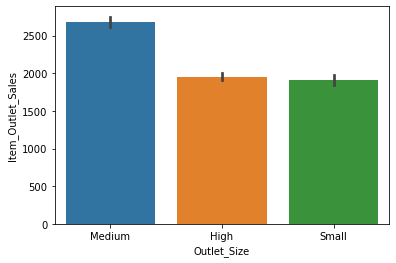

In [36]:
sns.barplot(x='Outlet_Size', y = 'Item_Outlet_Sales', data = data_Train)

**Observation** : Maximum sales is observed in Mid Sized Outlets.

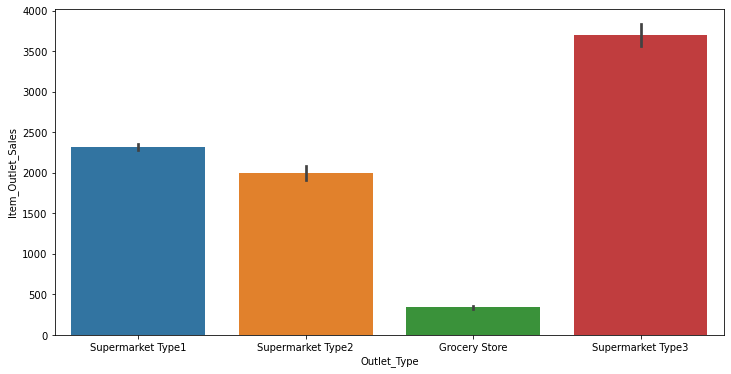

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x='Outlet_Type', y = 'Item_Outlet_Sales', data = data_Train)

**Observation** :  Most of the sales are hapenning in Supermarket Type 3.

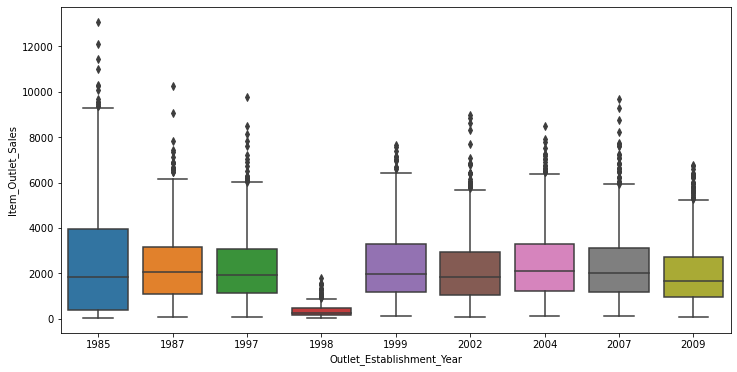

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = data_Train)

**Observation**: Outliers are observed across all the years and the least sales is observed in the outlets established in 1998. 

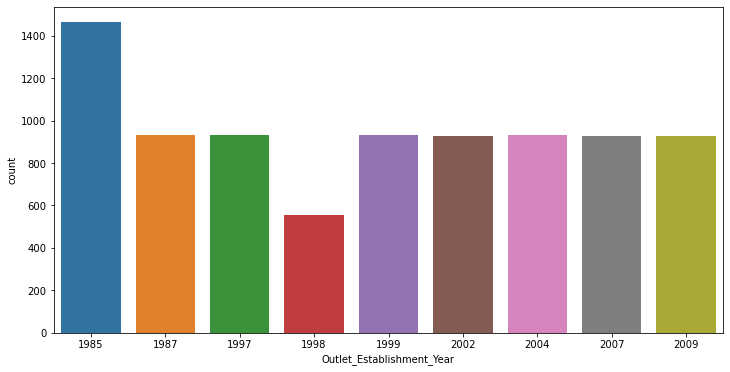

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(data_Train.Outlet_Establishment_Year)

**Observation**: In the dataset we have few transactions of outlets established in 1998. <br>
This implies that there is less footfalls in outlets established in 1998 and therefore the sales is believed the least. 

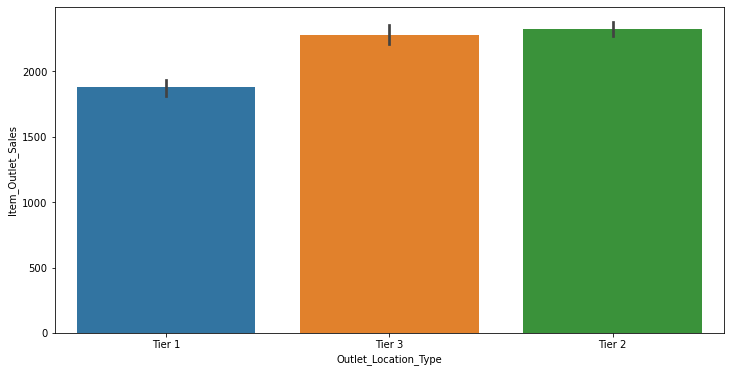

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x='Outlet_Location_Type', y = 'Item_Outlet_Sales', data = data_Train)

**Observation** : Maximum sales is observed in Tier 2 and 3 cities. Now we should inspect more for low sales in Tier 1 cities.

In [41]:
data_Train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

**Observation** : The number of outlets in Tier 1 cities is less than that of Tier 2 and 3 cities. There are more people living in Tier 1 cities and we can expect more Sales over there. But this is not observed in the above graph.<br>
<br>
**Let us find what factors are influencing the low sales in Tier 1 cities.**

In [42]:
data_Train.groupby('Outlet_Location_Type')['Item_MRP'].mean()

Outlet_Location_Type
Tier 1    140.870106
Tier 2    141.167196
Tier 3    140.935232
Name: Item_MRP, dtype: float64

**Observation**: We wanted to inspect whether Item_MRP has any impact in Low Sales in Tier 1 cities, but from the table above
we observe that there average MRP across 3 different Outlet_Location_Type is similar.

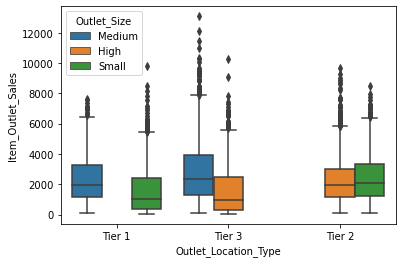

In [44]:
sns.boxplot(x='Outlet_Location_Type', y = 'Item_Outlet_Sales', hue='Outlet_Size', data = data_Train)

**Observation**: There are no big outlets in Tier 1 cities. <br>
    This gives us the reason why there is less sales in Tier 1 cities.

## 5. Feature Engineering  <a id=5>

We want to convert **Outlet_Size** column as it is nominal.

In [45]:
data_Train['Outlet_Size'] = data_Train['Outlet_Size'].replace({'Small':0, 'Medium':1, 'High':2})

In [46]:
data_Test['Outlet_Size'] = data_Test['Outlet_Size'].replace({'Small':0, 'Medium':1, 'High':2})

#### Classify the items into broad categories - Creating a derived attribute

**Let's derive Item_Category based on the Item_Identifier.**

If we check the column Item_Identifier keenly we can observe that, Item_Identifier has a code prefixed in it based on the category which they belogns to(FDA15, DRC01, FDX07, NCD19...etc.). Broadly there are three categories of items each of which are identified by FD, DR and NC. Here I'm naming the derived column as Item_Category. 

In [47]:
data_Train['Item_Category'] = data_Train['Item_Identifier'].apply(lambda x: x[0:2])

In the above line of code, we are extracting the first 2 letters of the Item Identifier.  <br>
FDA15 --> FD  <br>
DRC01 --> DR  <br>

In [48]:
data_Train['Item_Category'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Category, dtype: int64

Lets do the same for test data.

In [49]:
data_Test['Item_Category'] = data_Test['Item_Identifier'].apply(lambda x: x[0:2])

In [50]:
data_Test['Item_Category'].value_counts()

FD    4076
NC    1087
DR     518
Name: Item_Category, dtype: int64

Lets look at the original data and observe which columns require more cleaning.

In [51]:
data_Train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,train,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,train,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700,train,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,Tier 3,Grocery Store,732.3800,train,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052,train,NC


If we study the various columns in the data frame we can observe that column Item_Fat_Content has values the following values.

In [52]:
data_Train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [53]:
data_Test.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

We can see that column Item_Fat_Content has two different values indicating each amount of Fat Content such as **Low Fat and LF** for items with low value of Fat content. Similarly with the **Regular and reg** for regular fat content items.  <br>
We are going to replace these multiple categories into 2 categories.

In [54]:
data_Train['Item_Fat_Content'] = data_Train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data_Train.reset_index(level=0, inplace=True)

#Check if they are replaced properly
data_Train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [55]:
data_Test['Item_Fat_Content'] = data_Test['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data_Test.reset_index(level=0, inplace=True)

#Check if they are replaced properly
data_Test.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

Now we have two types of fat contents for all the items, however we know from the previous steps that we have non-consumable items. Having fat content for those items doesn't make sense. Let's create a new category for them. 

In [56]:
data_Train.loc[data_Train['Item_Category']=="NC",'Item_Fat_Content'] = "Non-Edible"

In [57]:
data_Test.loc[data_Test['Item_Category']=="NC",'Item_Fat_Content'] = "Non-Edible"

Let's have a look at the data once

In [58]:
data_Test.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'Non-Edible'], dtype=object)

In [59]:
pd.crosstab(data_Train.Outlet_Size,1)

col_0,1
Outlet_Size,
0,2388
1,2793
2,3342


## 6. Handling Categorical Variables  <a id=6>

In [60]:
data_Train.head()

# Lets drop the columns which have been feature engineered and have no effect on the model

data_Train.drop(['index','Item_Identifier','Outlet_Identifier','Source','Outlet_Establishment_Year'], axis=1, inplace=True)
data_Train.shape

(8523, 10)

In [61]:
data_Train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,9.30,Low Fat,0.016047,Dairy,249.8092,1,Tier 1,Supermarket Type1,3735.1380,FD
1,5.92,Regular,0.019278,Soft Drinks,48.2692,1,Tier 3,Supermarket Type2,443.4228,DR
2,17.50,Low Fat,0.016760,Meat,141.6180,1,Tier 1,Supermarket Type1,2097.2700,FD
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,2,Tier 3,Grocery Store,732.3800,FD
4,8.93,Non-Edible,0.000000,Household,53.8614,2,Tier 3,Supermarket Type1,994.7052,NC


For model building with Sci-kit learn we need to have the variables as numerical values. However,we have few variables with the text columns. We are going to dummify these categorical columns before building network on it.

In [62]:
# All the categorical columns

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Category','Outlet_Type','Item_Type']

In [63]:
data_Train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Category'],
      dtype='object')

In [64]:
# Dataframe of all the categorical columns

categorical_cols=data_Train[var_mod]

In [65]:
# Lets convert 'Outlet_Size' to string data type

categorical_cols['Outlet_Size']=categorical_cols['Outlet_Size'].astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
# Lets check the value counts of the Outlet_Size

pd.crosstab(categorical_cols.Outlet_Size,1)

col_0,1
Outlet_Size,
0,2388
1,2793
2,3342


In the next step, we will dummify the categorical columns. We will also drop the first column of all the dummied categories.

In [68]:
dummy_encoded_Train_data = pd.get_dummies(categorical_cols, drop_first = True)

In [69]:
dummy_encoded_Train_data.shape

(8523, 26)

In [70]:
dummy_encoded_Train_data.columns

Index(['Item_Fat_Content_Non-Edible', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Size_1', 'Outlet_Size_2', 'Item_Category_FD',
       'Item_Category_NC', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      dtype='object')

Lets check the shape of data_Train before we merge it with dummy_encoded_train

In [72]:
data_Train.shape

(8523, 10)

In [73]:
data_Train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Category'],
      dtype='object')

Lets concat the two dataframe, data_Train and dummy_encoded_train

In [74]:
onehot_encoded_data_Train=pd.concat([data_Train,dummy_encoded_Train_data],1)

In [75]:
onehot_encoded_data_Train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Category', 'Item_Fat_Content_Non-Edible',
       'Item_Fat_Content_Regular', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Size_1', 'Outlet_Size_2',
       'Item_Category_FD', 'Item_Category_NC', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      dtype='object')

In [76]:
onehot_encoded_data_Train.shape

(8523, 36)

You can see that the number of columns have increased from 10 to 36 after one hot encoding.  <br>
Lets drop the categorical columns now, as we have their dummified columns as well.

In [77]:
drop_categorical_cols=data_Train[var_mod]

In [78]:
onehot_encoded_data_Train.drop(drop_categorical_cols,1,inplace=True)
onehot_encoded_data_Train.shape

(8523, 30)

We have dropped 6 categorical columns and brought down the columns to 30.

In [79]:
onehot_encoded_data_Train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Fat_Content_Non-Edible', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Size_1', 'Outlet_Size_2', 'Item_Category_FD',
       'Item_Category_NC', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      dtype='object')

### 7. Creating Train and Validation Data   <a id=7>

In this step we are going to create data models that are capable of predicting the Outlet_Sales. Inorder to create these models first we split the given Train dataset into Train and Validation datasets. Train dataset is the one which have the ItemOutlet_Sales values. We will train the model based on these values to validate the Validation dataset values.


In this first we are going to create a basic Linear Regression model.

Lets split the training features and label.

In [80]:
data_Train_Y = onehot_encoded_data_Train['Item_Outlet_Sales']
del onehot_encoded_data_Train['Item_Outlet_Sales']
data_Train_X = onehot_encoded_data_Train

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_Train_X, data_Train_Y, random_state=1, test_size=0.3)

In [82]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5966, 29)
(5966,)
(2557, 29)
(2557,)


Entire dataset has been splitted into Train and Test datasets X_train and X_test respectively. As a first model in creating data models for predicting Item_Outlet_Sales values, I'm going to create a linear regression model.

## 8. Linear Regression Model:  <a id=8>

In [83]:
# Setting to display all the columns of the dataframe

pd.options.display.max_columns=False   

In [84]:
X_train.shape

(5966, 29)

In [85]:
from sklearn import model_selection, metrics                                     # Importing model selection and metrics from sklearn
from sklearn.linear_model import LinearRegression                                # Importing LinearRegression from sklearn

lin_model = LinearRegression()
lin_model.fit(X_train,y_train)                                                   # Fitting the model on X_train and y_train

LinearRegression()

In [86]:
coef1 = pd.DataFrame(lin_model.coef_,index=X_train.columns)                       # Create a dataframe of all the columns and their coefficients                   

We can check the values of Co-efficients as 

In [87]:
coef1

,0
Item_Weight,2.211160
Item_Visibility,-427.081398
Item_MRP,15.661847
Item_Fat_Content_Non-Edible,25.540690
Item_Fat_Content_Regular,29.937296
Outlet_Location_Type_Tier 2,134.549382
Outlet_Location_Type_Tier 3,167.015380
Outlet_Size_1,75.777997
Outlet_Size_2,-151.761657
Item_Category_FD,95.749214


#### Intuition from the Co-efficient values:

After looking at the values of Co-efficients, we can see that
1. Each item Sales largely depends upon the Store in which we are selling it. 
2. Location of the outlet influences most of the Item Sales. 

We should clearly keep in mind that all these variables are inter-connected. We can't really identify how much an individual variable effects the Item_Outlet_Sales. Instead we assume that by keeping all the remaining variables fixed, how much a unit change in one variable effects overall Item_Outlet_Sales. 

In [88]:
data_train_predictions = lin_model.predict(X_test) 

In [89]:
# Lets have a look at some of the predictions

data_train_predictions[:8]

array([ 626.46312461, 1206.48253714, 3197.06472084, 1461.02970322,
        798.65605019, 3315.21599279,  998.26684355, 2359.86866874])

We will evaluate the model performance with the RMSE value for the  model. Let's find the RMSE for linear regression model we built

In [90]:
print("RMSE:",(np.sqrt(metrics.mean_squared_error(y_test, data_train_predictions))))

RMSE: 1124.5579942705017


In [91]:
lin_model.score(X_test,y_test)

0.5652545101896631

In [92]:
print(metrics.r2_score(y_test,data_train_predictions))

0.5652545101896631


## 9. XGBoost Regressor   <a id=9>

In [93]:
from xgboost.sklearn import XGBRegressor                                          # Importing the XGBoost Regressor

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [94]:
xgb = XGBRegressor(n_estimators=100,                                              # Number of trees
                   learning_rate=0.08,                                            # Learning Rate
                   gamma=0,                                                       # Minimum reduction in loss(entropy) to make further branches
                   subsample=0.75,                                                # Subsample ratio of the training instance
                   colsample_bytree=1,                                            # Subsample ratio of columns when constructing each tree
                   max_depth=7)                                                   # Max depth of each learner (Decision Tree)
xgb.fit(X_train.values,y_train.values)                                            # Fit the model  

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
y_pred = xgb.predict(X_test.values)                                              # Prediction of XGBoost Regressor

In [96]:
print('RMSE \n',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))              # Measuring the error

RMSE 
 1122.3221645456395


In [97]:
print(metrics.r2_score(y_test,y_pred))                                           # Checking the R2 score.

0.5669815009165937


**Observation** : The RMSE of the model has reduced slightly from 1124 to 1122.  <br>
Lets use Grid Search to find the best hyperparameters for the XGBoost model.

## 9.1 XGBoost Regressor with Grid Search CV   <a id=9.1>


In [98]:
from sklearn.model_selection import GridSearchCV                                  # Importing Grid Search

In [99]:
# param_grid is a dictionary containing different parameters for XGBoost

param_grid = {"max_depth": [3,5,10,15],
              "n_estimators": [50,100,200,300] , 
              "gamma": [0.1, 0.2, 0,3], 
              "learning_rate": [0.08],
              "min_child_weight": [5], 
              "colsample_bytree": [0.8], 
              "subsample": [0.85]} 

# Performing Grid Search on xgb regressor and param_grid parameters

grid_search = GridSearchCV(xgb, 
                           param_grid=param_grid,
                           cv = 2,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           verbose=2)

In [100]:
grid_search.fit(X_train.values,y_train.values)

Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:  1.3min finished


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.08, max_delta_step=0,
                                    max_depth=7, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1,...
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=0.75,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             n_jobs=-1,

Displaying the best parameters for XGBoost

In [101]:
print(grid_search.best_params_) 

{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.08, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.85}


Lets make the predictions using the best hyperparameters of XGBoost model.

In [102]:
y_pred = grid_search.predict(X_test.values)

In [103]:
print('RMSE \n',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))    # Measuring the error

RMSE 
 1078.4272087424827


In [104]:
print(metrics.r2_score(y_test,y_pred))                  # Checking the R2 score.

0.6001905602148383


**Observation**: The RMSE of the model has reduced further to 1075 after tuning the XGBoost. 

## 10. Model Evaluation   <a id=10>

In this phase of the project we're going to evaluate the models that we've built so far.
We will compare the RMSE obtained from different models.

RMSE for Linear Regression - 1124   <br>
RMSE for XGBoost - 1122   <br>
RMSE for XGBoost with GridSearchCV - 1078


XGBoost with GridSearchCV performed the best and we will use it to make predictions from the test data.

Let's glue these Item_Outlet_Sales values to our test dataset and create a csv file.

**Before make predictions on the Test Data, we need to preprocess the data in the same steps as the Train data**

In [106]:
print(data_Test.columns)                        
data_Test.shape

Index(['index', 'Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Source', 'Item_Category'],
      dtype='object')


(5681, 14)

In [107]:
print(data_Train.columns)
data_Train.shape

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Category'],
      dtype='object')


(8523, 10)

Lets drop some rows so that both the Train and Test have equal size.

In [108]:
data_Test.drop(['index','Item_Identifier','Outlet_Identifier','Source','Outlet_Establishment_Year'], axis=1, inplace=True)

In [109]:
data_Train.drop(['Item_Outlet_Sales'], axis=1, inplace=True)

In [110]:
# Join train and test

data = pd.concat([data_Train, data_Test])

In [111]:
# ALl categorical data

categorical_cols=data[var_mod]

In [112]:
# Lets convert 'Outlet_Size' to string data type

categorical_cols['Outlet_Size']=categorical_cols['Outlet_Size'].astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [113]:
# Get dummy values for all categorical data

dummy_encoded_data = pd.get_dummies(categorical_cols, drop_first = True)
dummy_encoded_data.shape

(14204, 26)

In [114]:
# Merge dummy encoded data with original data

one_hot_encoded_data = pd.concat([dummy_encoded_data, data],1)
one_hot_encoded_data.shape

(14204, 35)

In [115]:
# Remove all categorical data as we now have them dummified

one_hot_encoded_data.drop(categorical_cols,1,inplace=True)
one_hot_encoded_data.shape

(14204, 29)

In [116]:
# Extract the test data

one_hot_encoded_Test_data = one_hot_encoded_data[-5681:]

In [117]:
# Save it to a numpy array before model prediction

X_test = one_hot_encoded_Test_data.values

In [118]:
X_test.shape

(5681, 29)

In [119]:
X_train.shape

(5966, 29)

In [120]:
y_test_predict=grid_search.predict(X_test) 

In [121]:
y_test_predict.shape

(5681,)

In [122]:
data_Test['Item_Outlet_Sales']=y_test_predict

In [123]:
data_Test.to_csv("Retail_Data_Output_File.csv")